In [87]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.16.0'

In [88]:
place = 'Frimley , England'
G = ox.graph_from_place(place, network_type='drive')

In [89]:
# get n evenly-spaced colors from some matplotlib colormap
ox.plot.get_colors(n=5, cmap='plasma', return_hex=True)

['#0d0887', '#7e03a8', '#cc4778', '#f89540', '#f0f921']

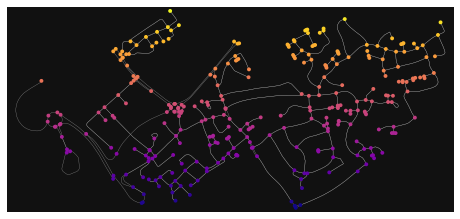

In [90]:

# get node colors by linearly mapping an attribute's values to a colormap
nc = ox.plot.get_node_colors_by_attr(G, attr='y', cmap='plasma')
fig, ax = ox.plot_graph(G, node_color=nc, edge_linewidth=0.3)

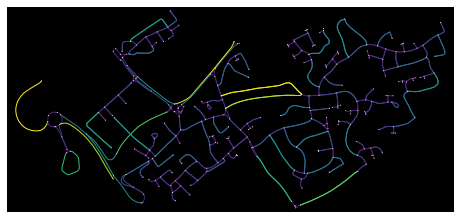

In [91]:
# when num_bins is not None, bin the nodes/edges then assign 1 color to each bin
# also set equal_size=True for equal-sized quantiles (requires unique bin edges!)
ec = ox.plot.get_edge_colors_by_attr(G, attr='length', num_bins=2)

# otherwise, when num_bins is None (default), linearly map 1 color to each node/edge by value
ec = ox.plot.get_edge_colors_by_attr(G, attr='length')

# plot the graph with colored edges
fig, ax = ox.plot_graph(G, node_size=1, edge_color=ec, bgcolor='k')

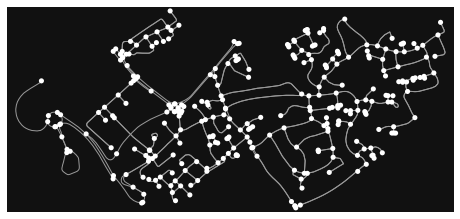

In [92]:
fig, ax = ox.plot_graph(G,
    ax=None,               #optionally draw on pre-existing axis
    figsize=(8, 8),        #figure size to create if ax is None
    bgcolor="#111111",     #background color of the plot
    node_color="w",        #color of the nodes
    node_size=26,          #size of the nodes: if 0, skip plotting them
    node_alpha=None,       #opacity of the nodes
    node_edgecolor="none", #color of the nodes' markers' borders
    node_zorder=1,         #zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
    edge_color="#999999",  #color of the edges
    edge_linewidth=1,      #width of the edges: if 0, skip plotting them
    edge_alpha=None,       #opacity of the edges
    show=True,             #if True, call pyplot.show() to show the figure
    close=False,           #if True, call pyplot.close() to close the figure: useful if plotting/saving many in a loop
    save=False,            #if True, save figure to disk at filepath
    filepath=None,         #if save is True, the path to the file
    dpi=300,               #if save is True, the resolution of saved file
    bbox=None)             #bounding box to constrain plot: if None, will calculate from spatial extents of graph

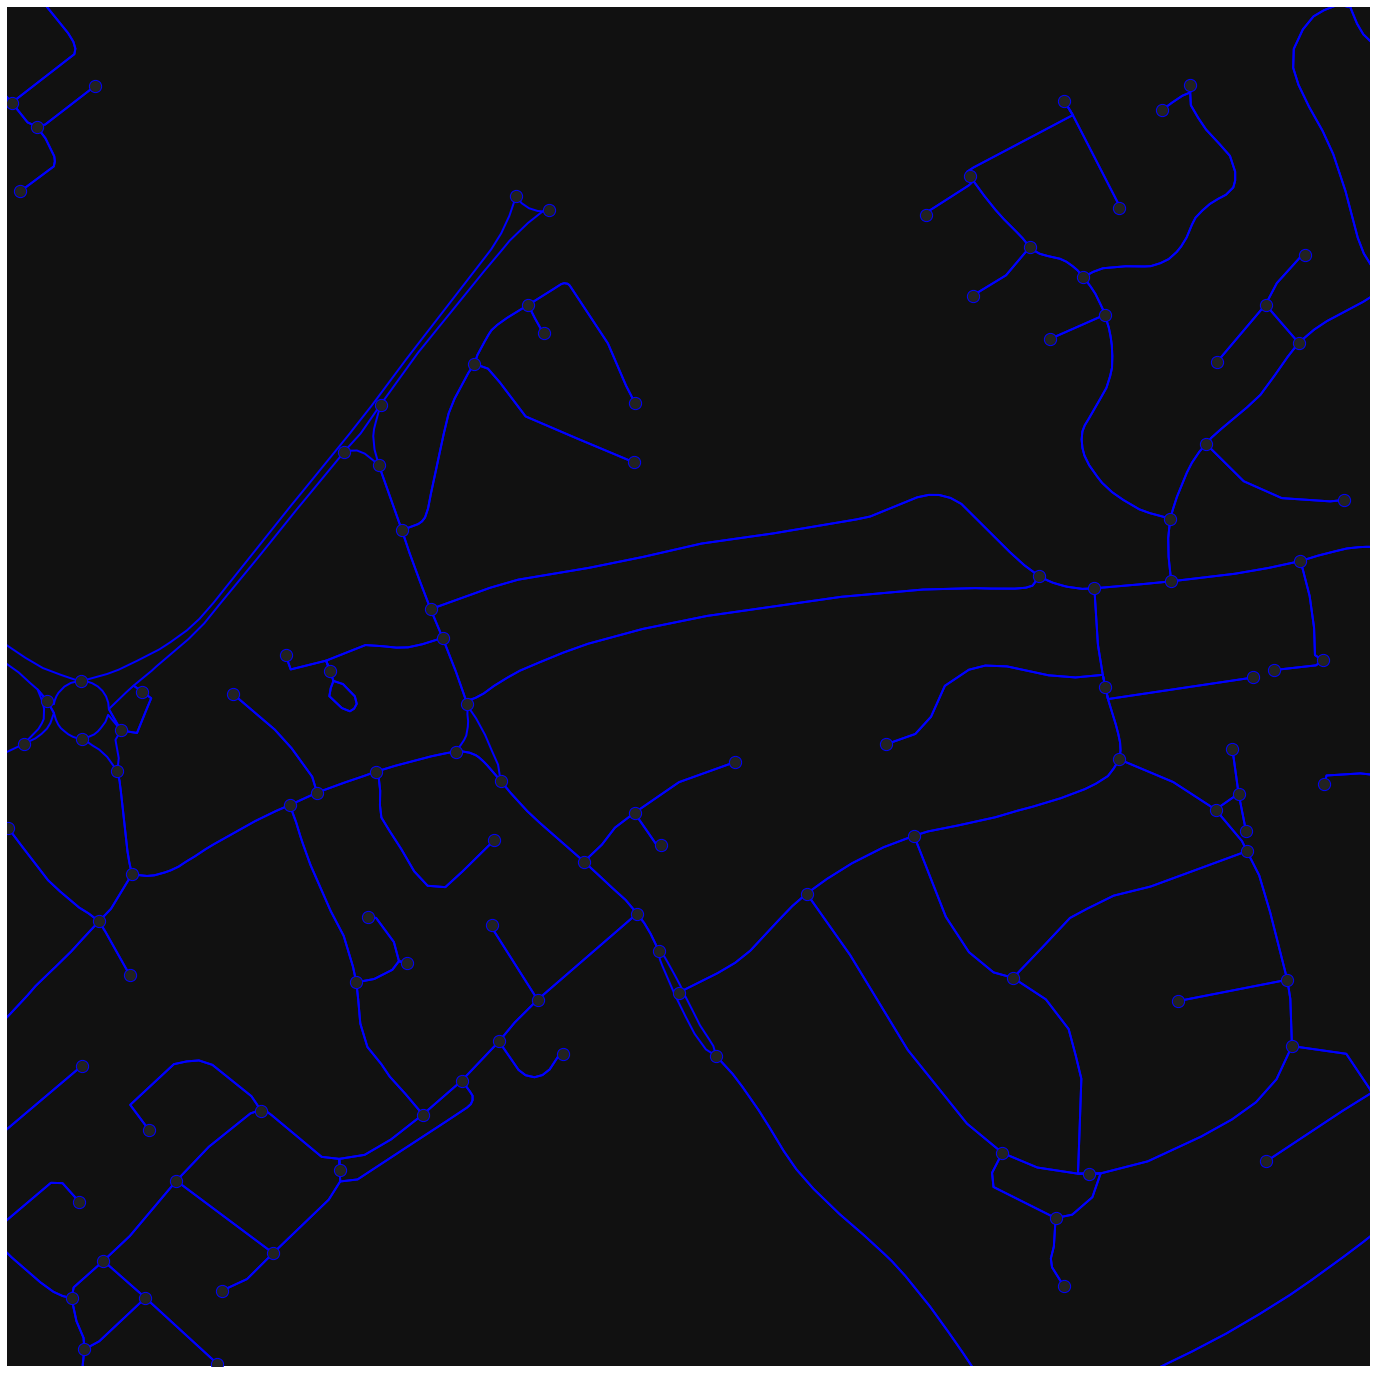

In [93]:
Gc = ox.consolidate_intersections(ox.project_graph(G), dead_ends=True)
c = ox.graph_to_gdfs(G, edges=False).unary_union.centroid
bbox = ox.utils_geo.bbox_from_point(point=(c.y, c.x), dist=500, project_utm=True)
fig, ax = ox.plot_graph(Gc, figsize=(25, 25), bbox=bbox, edge_linewidth=2, edge_color='b',
                        node_size=150, node_color='#222221', node_edgecolor='b')

In [127]:
# impute missing edge speeds and calculate free-flow travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# calculate 3 shortest paths, minimizing travel time
w = 'travel_time'
orig, dest = list(G)[11], list(G)[-10]
route1 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[11], list(G)[-1]
route2 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[11], list(G)[-90]
route3 = nx.shortest_path(G, orig, dest, weight=w)

In [128]:
# or save a figure to disk instead of showing it
fig, ax = ox.plot_graph(G, filepath='./images/image.png', save=True, show=False, close=True)

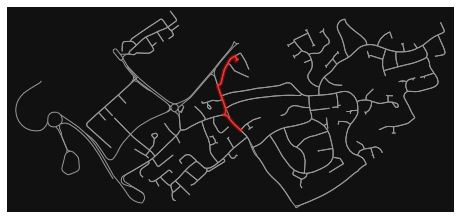

In [129]:
fig, ax = ox.plot_graph_route(G, route1, orig_dest_size=0, node_size=0)

In [97]:
# you can also pass any ox.plot_graph parameters as additional keyword args
fig, ax = ox.plot_graph_route(G, route1, save=True, show=False, close=True)

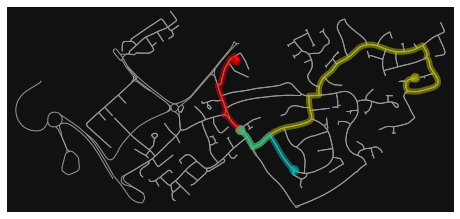

In [98]:
routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)

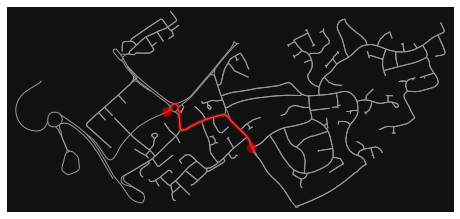

In [114]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# get the nearest network nodes to two lat/lng points
orig = ox.get_nearest_node(G, (51.315174, -0.746342))
dest = ox.get_nearest_node(G, (51.313370, -0.737860))

# find the shortest path between these nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=0)
